# Exercise 1 - k-NN Classification

In [ ]:
# we import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

## Question 1

The first step is to import the data from the 'microships.csv' folder in two different arrays: X and y. X which will correspond to the target and y the features.

In [40]:
X = np.loadtxt('microchips.csv', delimiter=',', dtype='float64', usecols=(0,1))
y = np.loadtxt('microchips.csv', delimiter=',', dtype='float64', usecols=2)

Then we can plot the figure. We chosed the inferno map to differentiate between black = 0 and yellow = 1

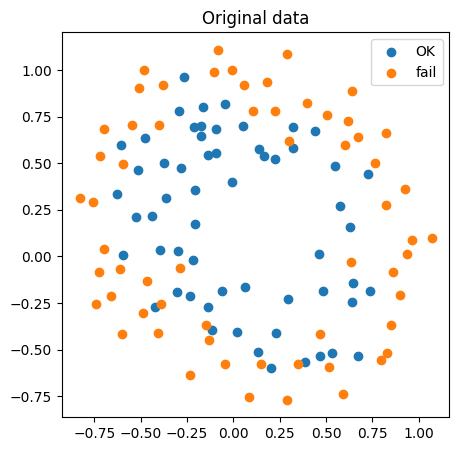

In [41]:
ok = X[y == 1]
fail = X[y==0]
plt.figure(figsize=(5,5))
plt.scatter(ok[:,0], ok[:,1], label='OK')
plt.scatter(fail[:,0], fail[:,1], label='fail')
plt.title('Original data')
plt.legend()
plt.show()

## Question 2

This function predicts if a point, according to a set of data, would be OK (1) or Fail(0)

In [42]:
def prediction(point, X_train, k):
    distance = np.array([np.sqrt((x[0] - point[0])**2 + (x[1] - point[1])**2) for x in X_train])
    k_indices = np.argsort(distance)[:k]
    k_nearest_labels = [y[i] for i in k_indices]
    if (np.average(k_nearest_labels) >= 0.5):
        return 1
    else:
        return 0

We define the 3 differents points as well as place them into an array to automatise their treatment

In [43]:
point1 = np.array([-0.3, 1.0])
point2 = np.array([-0.5, -0.1])
point3 = np.array([0.6, 0.0])
points = np.array([point1, point2, point3])

We define the number of different values of k here they are 1,3,5,7

In [44]:
ks = np.array([1,3,5,7])

In [45]:
for k in ks:
    print('k =', str(k))
    for p in range(len(points)):
        print("  chip", p + 1,':[',points[p][0], ', ', points[p][1], ']', end=' ==> ')
        result = prediction(points[p], X, k)
        if (result == 1):
            print('OK')
        else:
            print('Fail')

k = 1
  chip 1 :[ -0.3 ,  1.0 ] ==> OK
  chip 2 :[ -0.5 ,  -0.1 ] ==> Fail
  chip 3 :[ 0.6 ,  0.0 ] ==> Fail
k = 3
  chip 1 :[ -0.3 ,  1.0 ] ==> Fail
  chip 2 :[ -0.5 ,  -0.1 ] ==> Fail
  chip 3 :[ 0.6 ,  0.0 ] ==> OK
k = 5
  chip 1 :[ -0.3 ,  1.0 ] ==> Fail
  chip 2 :[ -0.5 ,  -0.1 ] ==> OK
  chip 3 :[ 0.6 ,  0.0 ] ==> OK
k = 7
  chip 1 :[ -0.3 ,  1.0 ] ==> Fail
  chip 2 :[ -0.5 ,  -0.1 ] ==> Fail
  chip 3 :[ 0.6 ,  0.0 ] ==> OK


## Question 3

Here we resize the plot by taking the minimum and maximum values in x and y coordinates, then we set the grid size and create the linspace and the grid

In [46]:
min_x, max_x = min(X[:, 0]), max(X[:, 0])
min_y, max_y = min(X[:, 1]), max(X[:, 1])
grid_size = 100
x_axis = np.linspace(min_x, max_x, grid_size)
y_axis = np.linspace(min_y, max_y, grid_size) 
grid = np.zeros(shape=(len(x_axis), len(y_axis)))

Here, we will go through both axis and set up a color depending on the predicition. Yellow means 1 or 'OK' while black means 0 or Fail.
To predict the error, we will go through all the values of X and compare the result (depending on the k) with the prediction.
There is an error when the result is different than the prediction. We will note this into a variable error and calculate the overall accuracy of the model. We can note that when k = 1, the accuracy is 1 (or 100%)

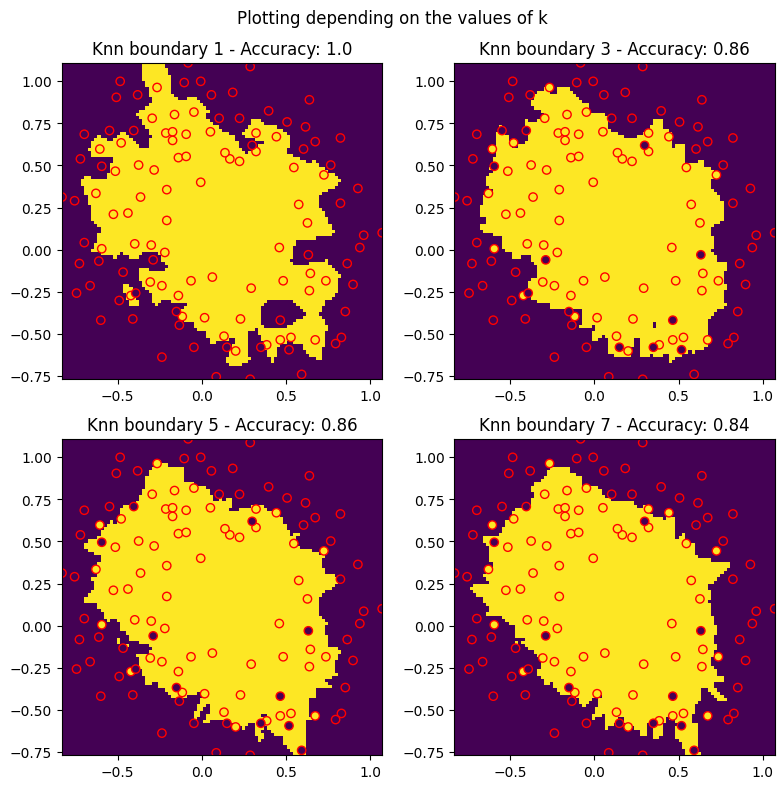

In [47]:
grid_shape = (2, 2)
plt.figure(figsize=(8,8))
plt.suptitle("Plotting depending on the values of k")
for idx, k in enumerate(ks):
    plt.subplot(grid_shape[0], grid_shape[1], idx + 1)
    for ix, vx in enumerate(x_axis):
        for iy, vy in enumerate(y_axis):
            grid[ix, iy] = prediction(np.array([vx, vy]), X, k)
            # print(grid[ix, iy])
    error = 0
    for x in range(len(X)):
        pred = prediction(np.array([X[x][0], X[x][1]]), X, k)
        result = y[x]
        if (int(pred) != int(result)):
            error += 1
    accuracy = 1 - (error / len(X))
    accuracy = round(accuracy, 2)
    plt.imshow(grid.T, origin='lower', extent=(min_x, max_x, min_y, max_y))
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='r')
    title = 'Knn boundary ' + str(k) + ' - Accuracy: ' + str(accuracy)
    plt.title(title)
plt.tight_layout()
plt.show()

### References

Matplotlib : https://github.com/rafaelmessias/2dv516/blob/master/2dv516-python-1-part-3-matplotlib.ipynb
